In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tifffile as tf
import torch

In [22]:
# log_file = '/home/brysongray/bmap/data/neurotrack_outputs/simulated_with_artifacts_sac_training_output/simulated_b-0_04-03-25_log.csv'
log_file = "/home/brysongray/bmap/data/neurotrack_outputs/neuromorpho_with_artifacts_sac_training_output/neuromorpho_2_04-05-25_log.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(log_file)

# Convert the DataFrame to a dictionary
# Each column becomes a key in the dictionary
log_dict = df.to_dict()

print(f"Log file loaded with {len(df)} entries and {len(df.columns)} columns")
print(f"Column names: {df.columns.tolist()}")

Log file loaded with 22 entries and 5 columns
Column names: ['episode', 'image_file', 'num_branches', 'episode_return', 'episode_avg_policy_loss']


In [23]:
episode_returns = list(log_dict['episode_return'].values())

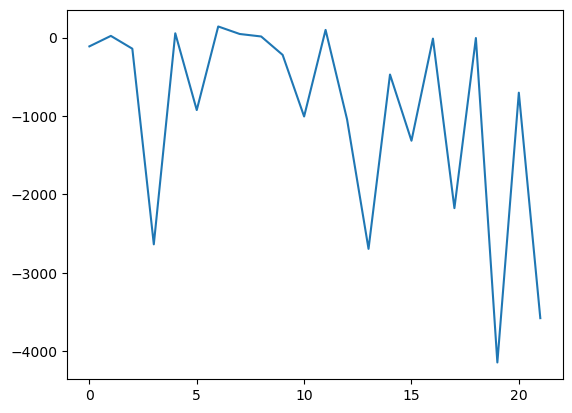

In [24]:
plt.plot(episode_returns)

In [54]:
img_dir = '/nafs/dtward/bryson/data/simulated_neurons/3d_with_artifacts_b-0'
img_files = sorted([f for x in os.walk(img_dir) for f in glob(os.path.join(x[0], '*image.tif'))])
density_files = sorted([f for x in os.walk(img_dir) for f in glob(os.path.join(x[0], '*density.tif'))])

idx = 2
img = tf.imread(img_files[idx])
density = tf.imread(density_files[idx])

In [46]:
density.shape

(1, 69, 60, 61)

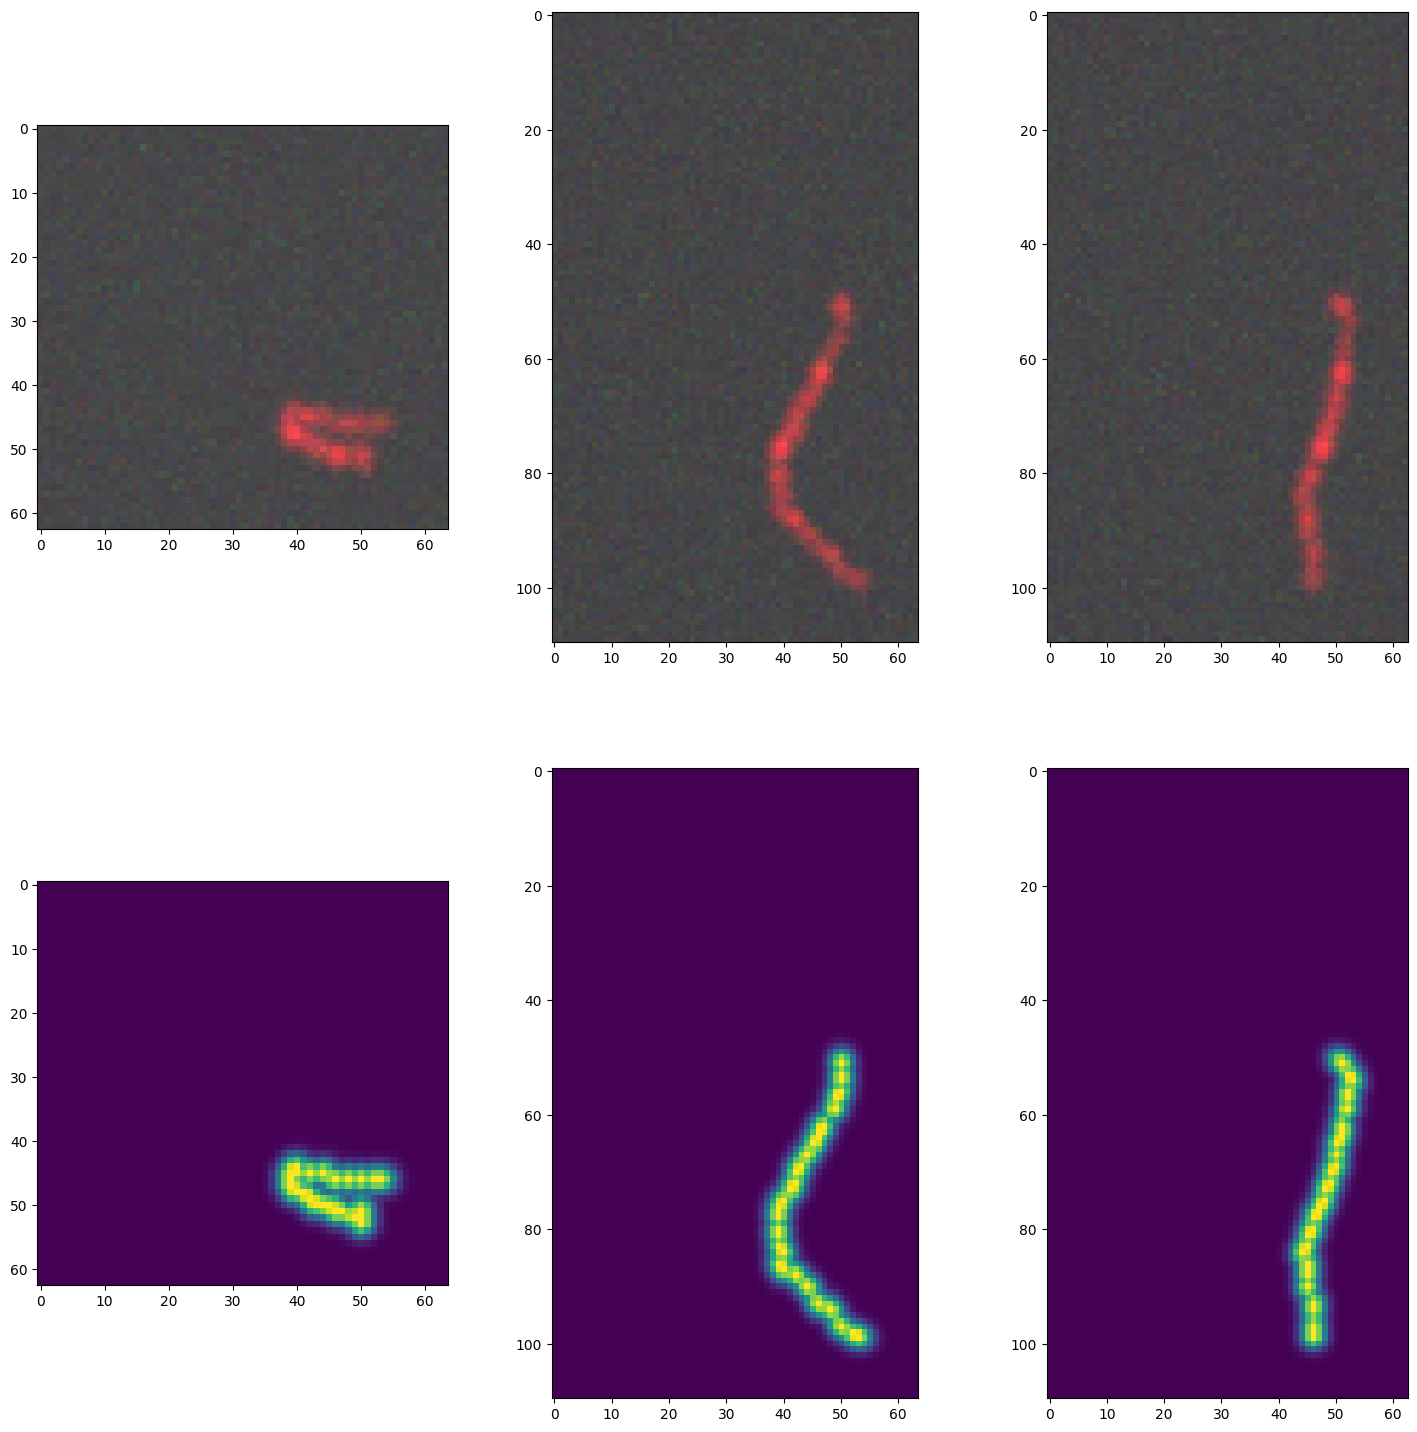

In [55]:
fig, ax = plt.subplots(2,3, figsize=(18,18))
ax[0,0].imshow(img.transpose(1,2,3,0).max(0))
ax[0,1].imshow(img.transpose(1,2,3,0).max(1))
ax[0,2].imshow(img.transpose(1,2,3,0).max(2))
ax[1,0].imshow(density[0].max(0))
ax[1,1].imshow(density[0].max(1))
ax[1,2].imshow(density[0].max(2))


In [3]:
ep_snapshots_path = '/home/brysongray/bmap/data/neurotrack_outputs/episode_snapshots_neurom_with_artifacts_01-26-25/'
ep_snapshots_files = sorted([f for x in os.walk(ep_snapshots_path) for f in glob(os.path.join(x[0], '*.pt'))])
returns = []
coverages = []
for f in ep_snapshots_files:
    snapshot = torch.load(f)
    returns.append(snapshot['return'])
    coverages.append(snapshot['coverage'])

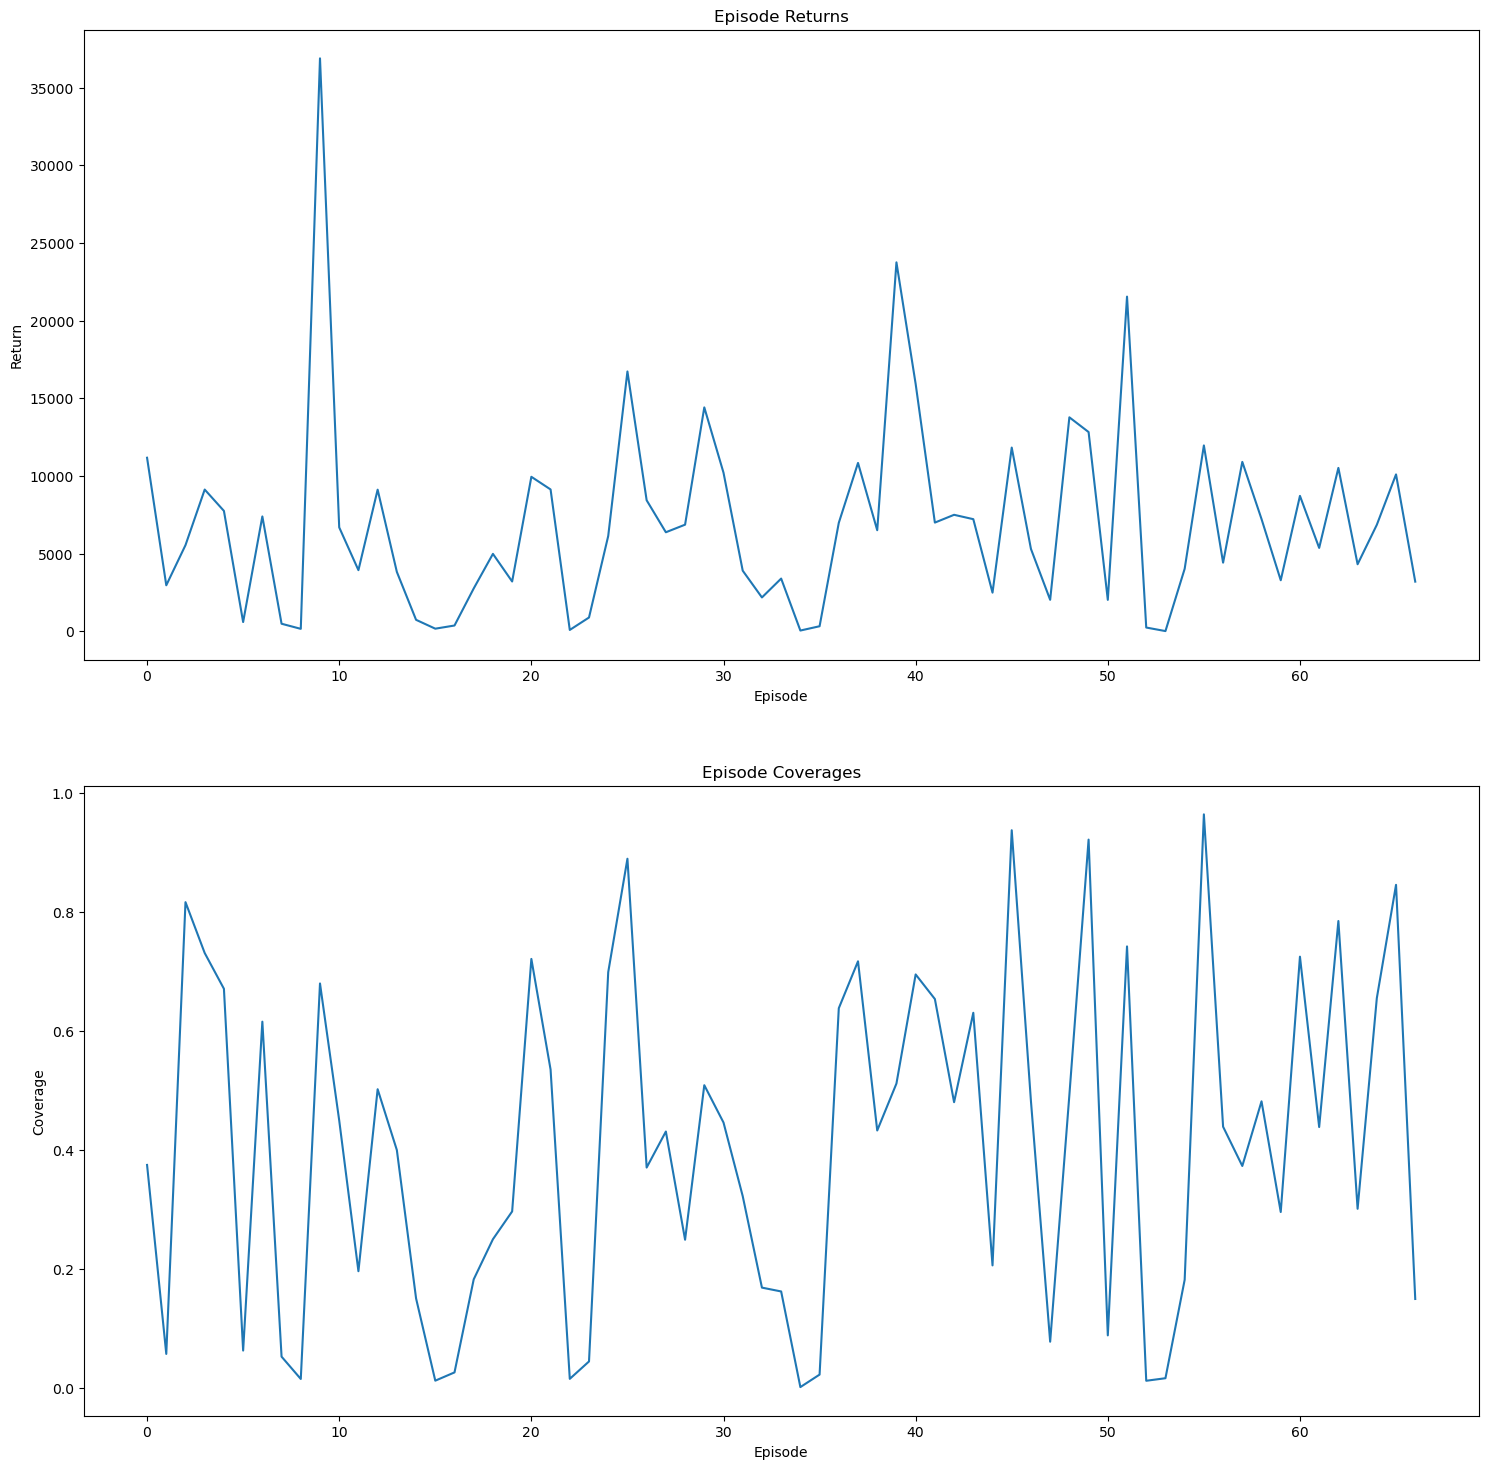

In [4]:
# plot returns and coverages
fig, ax = plt.subplots(2,1, figsize=(18,18))
ax[0].plot(returns)
ax[0].set_title('Episode Returns')
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Return')
ax[1].plot(coverages)
ax[1].set_title('Episode Coverages')
ax[1].set_xlabel('Episode')
ax[1].set_ylabel('Coverage')
plt.show()

In [6]:
print(f'Median coverage: {np.median(coverages)}')
print(f"Max coverage: {np.max(coverages)}")
print(f'Median return: {np.median(returns)}')
print(f'Max return: {np.max(returns)}')

Median coverage: 0.43293091654777527
Max coverage: 0.9641387462615967
Median return: 6371.97998046875
Max return: 36881.5625
